 # **PES University, Bangalore**

# **UE21CS342AA2 - Data Analytics**

## **Python Reference Codes**


##### This is a simple ipynb notebook that gives an idea of the syntaxes and codes which can be useful in general cases. Most of the topics have been covered with relevant datasets and examples. Feel free to use these to build and explore more on your own!

# Data Preprocessing

In [ ]:
# To import libraries
import pandas as pd #pandas library for data manipulations and data operations
import numpy as np #Numerical python (numpy) library contains basic linear algebra functions Fourier transforms,advanced random number capabilities
import matplotlib.pyplot as plt #this is a plotting based library
import seaborn as sns #data visulization library

In [ ]:
from pandas.core.frame import dataclasses_to_dicts
# To load the dataset
data = pd.read_csv("Global Population Trends.csv")


#dataset can be found here: https://drive.google.com/file/d/1eE3KhuI6lYfaVDYpwXWK_51d3YBq5_Dy/view?usp=sharing

In [ ]:
# create a copy of the original DataFrame
df = data.copy()


In [ ]:
# check for missing values
print(df.isnull().sum())

Country                  0
Year                     0
Total Population         0
Urban Population         0
Rural Population         0
Population Density       0
Life Expectancy          0
Birth Rate               0
Death Rate               7
Fertility Rate           3
Infant Mortality Rate    0
Growth Rate              0
dtype: int64


**Handling Missing Data:**
Missing data happens very frequently. Options for handling missing data are:

- Removing the observations with missing data:

  Pros: Very simple.

  Cons: You lose valuable data from other columns.


- Replacing numerical missing values with the mean of the column

  Pros: Simple. Keeps the data from other columns.

  Cons: A bit arbitrary. Do not use when you have a lot of missing data. Not applicable to categorical data.

There are other strategies in addition to mean (e.g. most_frequent). These other strategies can also make sense depending on the context.

In [ ]:
# handle missing values in the DataFrame by filling in the mean value
df['Death Rate'].fillna(df['Death Rate'].mean(), inplace=True)

#to drop rows containing NULL values
df.dropna(inplace=True)

In [ ]:
#The following codes are commented as they do not apply to the sample dataset we have taken. It is to give you guys a basic idea of how it works :)



# Categorical variables can be encoded using one-hot encoding

# df = pd.get_dummies(df, columns=['Col1', 'Col2'], prefix=['Col 1', 'Col 2'])


# # To normalize the values of a numeric column
# from sklearn.preprocessing import Normalizer
# normalizer = Normalizer()
# df['Population_normalized'] = normalizer.fit_transform(df[['Population']])


# # To apply a min-max scaling to a numeric column
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df['Population_scaled'] = scaler.fit_transform(df[['Population']])

# # To apply a box-cox transformation to a numeric column
# from scipy.stats import boxcox
# df['Population_transformed'], lambda_ = boxcox(df['Population'])

# EDA

Global Population Trends is the sample dataset used which contains almost 215 countries demographics insights (2016 to 2022). The dataset can be found here(https://www.kaggle.com/datasets/alitaqi000/global-population-trends2016-2022/code?select=Global+Population+Trends%282016-2022%29.csv)

In [ ]:
# To print the first few rows of the DataFrame - df
print(df.head())

       Country  Year Total Population Urban Population Rural Population  \
0  Afghanistan  2017                -                -                -   
1  Afghanistan  2018      3,66,86,784        93,53,296      2,73,33,488   
2  Afghanistan  2019      3,77,69,499        97,27,157      2,80,42,342   
3  Afghanistan  2020      3,89,72,230      1,01,42,913      2,88,29,317   
4  Afghanistan  2021      4,00,99,462      1,05,51,772      2,95,47,690   

  Population Density Life Expectancy  Birth Rate  Death Rate Fertility Rate  \
0                 55              63      37.342       7.027          5.129   
1                 56              63      36.927       6.981          5.002   
2                 58              64      36.466       6.791           4.87   
3                 60              63      36.051       7.113           4.75   
4                  -              62      35.842       7.344          4.643   

  Infant Mortality Rate Growth Rate  
0                  49.4           - 

In [ ]:
# To print the DataFrame's shape
print(df.shape)

(1070, 12)


In [ ]:
# To print the DataFrame's data types
print(df.dtypes)

Country                   object
Year                       int64
Total Population          object
Urban Population          object
Rural Population          object
Population Density        object
Life Expectancy           object
Birth Rate               float64
Death Rate               float64
Fertility Rate            object
Infant Mortality Rate     object
Growth Rate               object
dtype: object


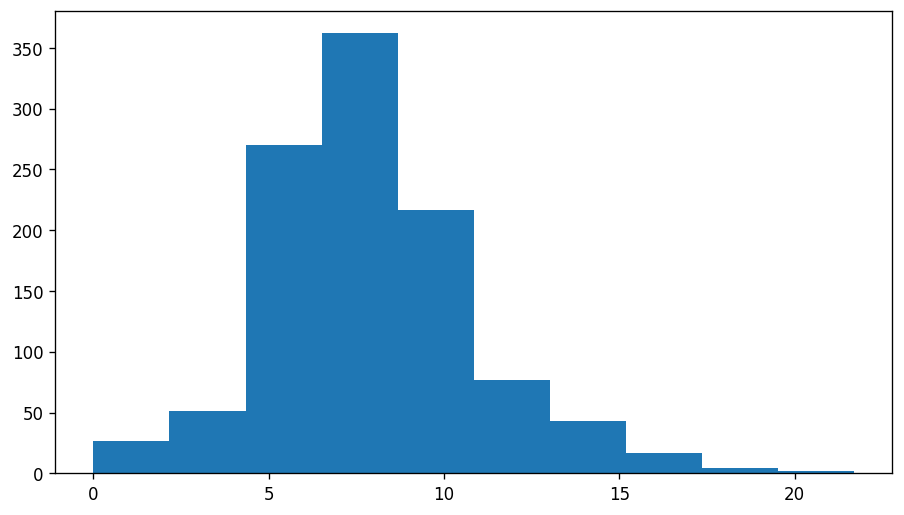

In [ ]:
# visualize the distribution of a numeric column
plt.hist(df['Death Rate'])
plt.show()


In [ ]:
# calculate basic statistics for a numeric column
print(df['Life Expectancy'].describe())

count     1070
unique      36
top         74
freq        63
Name: Life Expectancy, dtype: object


In [ ]:
# calculate the correlation between two numeric columns
print(df['Birth Rate'].corr(df['Death Rate']))


-0.09242949591153808


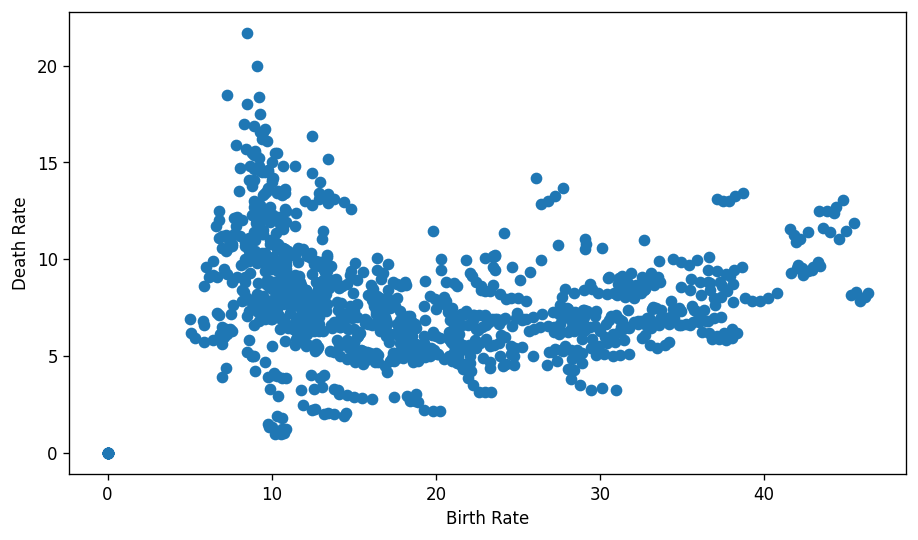

In [ ]:
# create a scatter plot to visualize the relationship between two numeric columns
plt.scatter(df['Birth Rate'], df['Death Rate'])
plt.xlabel('Birth Rate')
plt.ylabel('Death Rate')
plt.show()

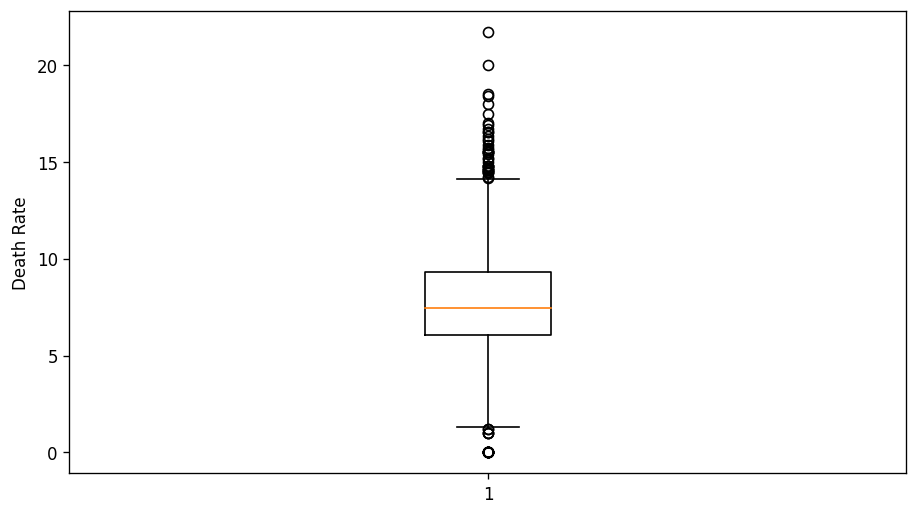

In [ ]:
# create a box plot to visualize the distribution of a numeric column
plt.boxplot(df['Death Rate'])
plt.ylabel('Death Rate')
plt.show()


In [ ]:
# create a pairplot to visualize the relationships between multiple numeric columns
sns.pairplot(df, vars=['Fertility Rate','Infant Mortality Rate', 'Growth Rate'])
plt.show()

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7e88295dc8b0> (for post_execute):


KeyboardInterrupt: ignored

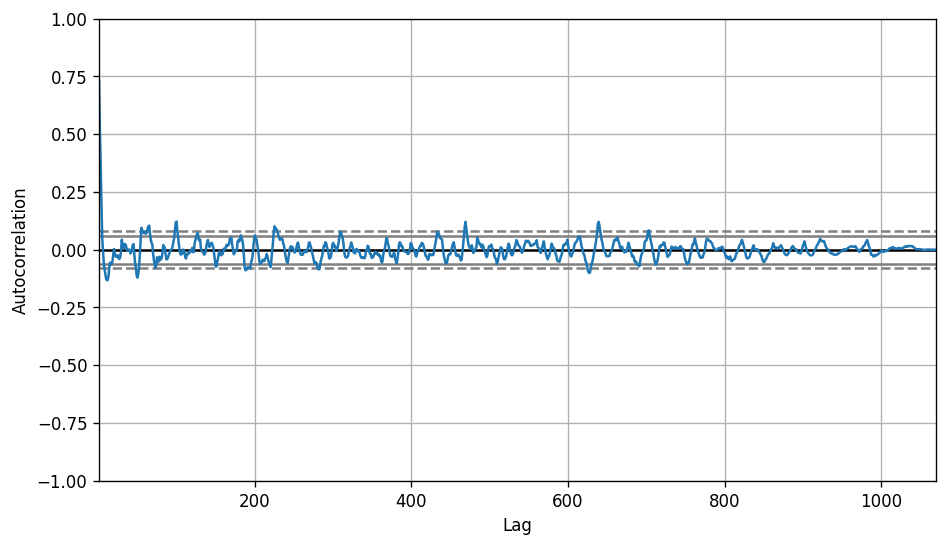

In [ ]:
# create an autocorrelation plot to visualize the autocorrelation in a numeric column
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Death Rate'])
plt.show()

In [ ]:
# # create a scatter plot matrix to visualize the relationships between multiple numeric columns
# from pandas.plotting import scatter_matrix
# scatter_matrix(df[['Urban Population' , 'Rural Population' , 'Year']], alpha=0.2, figsize=(6, 6))
# plt.show()

In [ ]:
# Calculating the skewness and kurtosis of a numeric column
print(df['Death Rate'].skew())
print(df['Death Rate'].kurtosis())

0.6204560868236018
1.465702679334536


In [ ]:
# To perform a t-test to compare the means of two numeric columns
from scipy.stats import ttest_ind
t, p = ttest_ind(df['Death Rate'], df['Birth Rate'])
print(t, p)

-34.58430736836859 1.5024298082873098e-208


In [ ]:

# perform an ANOVA test to compare the means of two or more numeric columns
from scipy.stats import f_oneway
f, p = f_oneway(df['Death Rate'], df['Birth Rate'])
print(f, p)

1196.0743161497949 1.5024298082870766e-208


# Regression

### IMPORTING LIBRARIES AND PRELIM­INARY OPERATIONS

In [ ]:
#data libraries
import pandas as pd
import numpy as np

#viz libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

<ipython-input-139-5ed4a5763bad>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

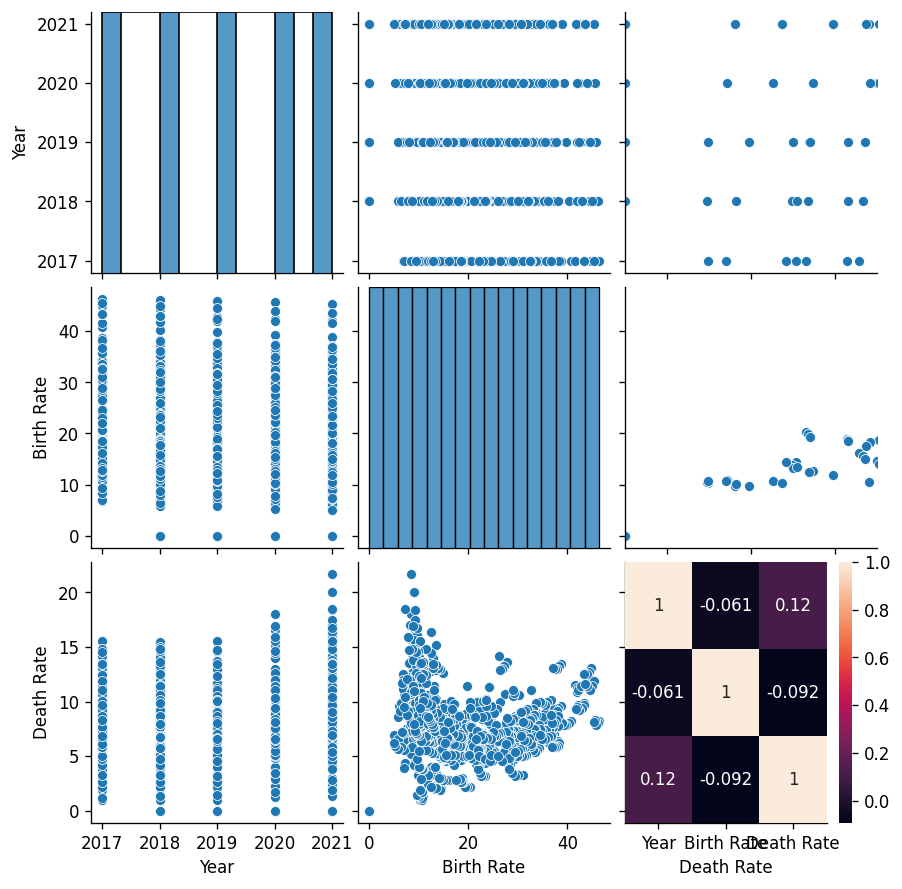

In [ ]:
# VISUALISATION OF DATA

#pairplot
sns.pairplot(df)

# #distri­bution plot

# sns.distplot(df['Y'])

# #heatmap with values
sns.heatmap(df.corr(), annot = True)


### MODEL TRAINING AND FITTING

In [ ]:
# MODEL TRAINING

# Creating X and y
X = df[['c­ol1­','­col­2',­...]]  #create df features
y = df['col']    #create df var to predict


# Spliting dataset in train and test df
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#0.2 specifies only 20% of the whole data is taken as our test set and 80% as train set


SyntaxError: ignored

In [ ]:
# MODEL FITTING
lm = Linear­Reg­res­sion()   #instatiate model

lm.fit­(X_­train, y_train)  #train/fit the model

### VIEWING RESULTS AND PREDICTIONS

In [ ]:
#RESULTS

lm.int­ercept_   #show intercept

lm.coef_        #show coeffi­cients

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])*   #create coeff df


In [ ]:
#MAKING PREDICTIONS

predic­tions = lm.pre­dic­t(X­_test)   #create predic­tions

plt.sc­att­er(­y_t­est­,pr­edi­cti­ons)*   #plot predic­tions

sns.di­stp­lot­((y­_te­st-­pre­dic­tio­ns)­,bi­ns=50)*    #distplot of residuals


#### **scatter:** this graph show the difference between actual values and the values predicted by the model we trained. It should resemble as much as possible a diagonal line.

#### **distplot:** this graph shows the distri­butions of the residual errors, that is, the difference between the actual values minus the predicted values; it should result in an as much as possible normal distri­bution. If not, maybe changing the model.

In [ ]:
# EVALUATION METRICES

print(­'MAE:', metric­s.m­ean­_ab­sol­ute­_er­ror­(y_­test, predic­tions))
print(­'MSE:', metric­s.m­ean­_sq­uar­ed_­err­or(­y_test, predic­tions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

#### **MAE** is the easiest to unders­tand, because it's the average error.

#### **MSE** is more popular than MAE, because MSE "­pun­ish­es" larger errors, which tends to be useful in the real world.

#### **RMSE** is even more popular than MSE, because RMSE is interp­retable in the "­y" units.

# Time Series Analysis

The data for a time series typically stores in .csv files or other spreadsheet formats and contains two columns: the date and the measured value.

In [ ]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
#Adding the parse_dates=['date'] argument will make the date column to be parsed as a date field.
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()



In [ ]:
#Using MATPLOTLIB for visualising time series

# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

In [ ]:
# Seasonal Plot of a Time Series:

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=15)
plt.show()

In [ ]:
# Patterns in a time series
#Splitting time series into componenets: Trend and Seasonality

fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

#### Additive and multiplicative decomposition of a time series


In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()


####  Test for Stationarity

In [ ]:
# ADF and KPSS are two tests

from statsmodels.tsa.stattools import adfuller, kpss
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

In [ ]:
# white noise: a sequence of completely random numbers with mean zero is a white noise.
randvals = np.random.randn(1000)
pd.Series(randvals).plot(title='Random White Noise', color='k')

#### Detrending a time series

In [ ]:
#  Method 1: Using scipy: Subtract the line of best fit
from scipy import signal
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
detrended = signal.detrend(df.value.values)
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)

In [ ]:
# Method 2: Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

#### Deseasonalize a time series

In [ ]:
# Subtracting the Trend Component.
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()

#### Seasonality test

In [ ]:
from pandas.plotting import autocorrelation_plot
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())

### ACF and PACF (autocorrelation and partial autocorrelation)

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])

# ML Models

In [ ]:
#example on how it works
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

#### Loading data

In [ ]:
import numpy as np
X = np.random.random((11,5))
y = np.array(['M','M','F','F','M','F','M','M','F','F','F'])
X[X < 0.7] = 0

#### Data Standardization and Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X_train)
normalized_X = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

#### Training and Testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

### Model Creation

#### Supervised Learning Estimators

In [ ]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
# Support Vector Machines (SVM)
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
# KNN
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

#### Unsupervised Learning Estimators

In [ ]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

In [ ]:
# K Means
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0)

### Model Fitting

#### Supervised learning

In [ ]:
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

#### Unsupervised Learning

In [ ]:
k_means.fit(X_train)
pca_model = pca.fit_transform(X_train)

### Prediction

#### Supervised Estimators

In [ ]:
y_pred = svc.predict(np.random.random((2,5)))

y_pred = knn.predict_proba(X_test)

#### Unsupervised Estimators

In [ ]:
y_pred = k_means.predict(X_test)

### Model's Performance Evaluation

#### Classification Metrics

In [ ]:
# Accuracy Score

knn.score(X_test, y_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

#### Regression Metrics

In [ ]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2]
mean_absolute_error(y_true, y_pred)

In [ ]:
#R2 Score
from sklearn.metrics import r2_score
r2_score(y_true, y_pred)